In [1]:
%pip install kaggle

## Download dataset


In [56]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")

print("Path to dataset files:", path)
print(path)
data = pd.read_csv(path + "/bank-additional-full.csv", sep=";")
data.head()

Using Colab cache for faster access to the 'bank-marketing' dataset.
Path to dataset files: /kaggle/input/bank-marketing
/kaggle/input/bank-marketing


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Dataset Preprocessing

In [57]:
data["y"] = data["y"].map({"yes": 1, "no": 0})  # convert target to binary

In [58]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [59]:
df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [60]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


# Model Training

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
X = df.drop("y", axis=1)
y = df["y"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = LinearSVC(random_state=42, max_iter=5000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Inference

In [64]:
y_pred = svm.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9050740470988103
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.66      0.34      0.45       935

    accuracy                           0.91      8238
   macro avg       0.79      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238

Confusion Matrix:
 [[7134  169]
 [ 613  322]]


<Axes: >

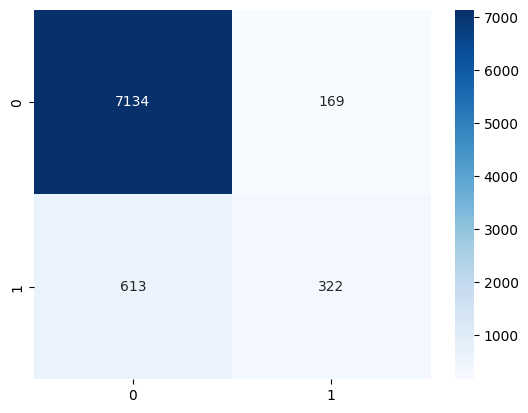

In [66]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

# Non-Linear kernel SVM

In [67]:
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [68]:
y_pred_rbf = svm_rbf.predict(X_test)

Accuracy: 0.8945132313668366
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.63      8238
weighted avg       0.87      0.89      0.87      8238

Confusion Matrix:
 [[7176  127]
 [ 742  193]]


<Axes: >

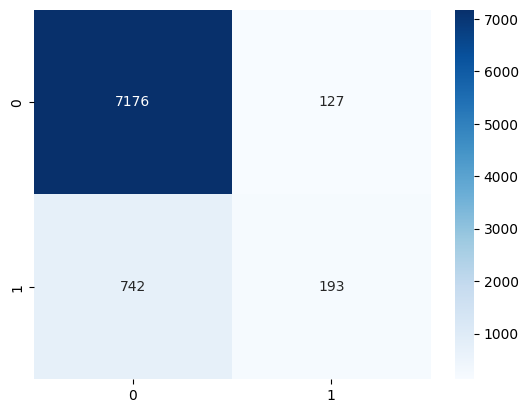

In [69]:
accuracy = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, y_pred_rbf)
print("Classification Report:\n", classification_rep)
confusion_mat = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix:\n", confusion_mat)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

In [75]:
svm_poly = SVC(kernel="poly", degree=5, coef0=1, C=1)
svm_poly.fit(X_train, y_train)

SVC(C=1, coef0=1, degree=5, kernel='poly')

In [76]:
y_pred_poly = svm_poly.predict(X_test)

Accuracy: 0.8953629521728574
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.22      0.32       935

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238

Confusion Matrix:
 [[7170  133]
 [ 729  206]]


<Axes: >

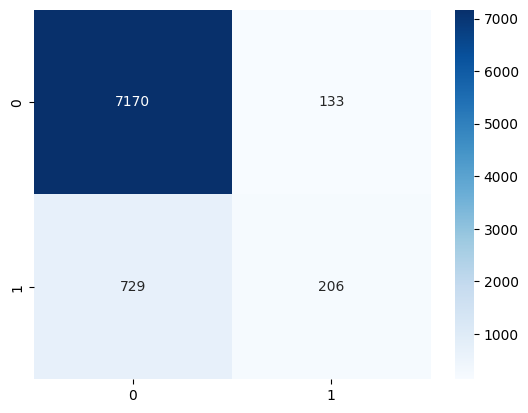

In [77]:
accuracy = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, y_pred_poly)
print("Classification Report:\n", classification_rep)
confusion_mat = confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix:\n", confusion_mat)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

# Improvement based on Observation

In [78]:
svm_obs = LinearSVC(random_state=42, max_iter=5000, class_weight='balanced')
svm_obs.fit(X_train, y_train)


LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)

In [79]:
y_pred_obs = svm_obs.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred_obs)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, y_pred_obs)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8580966253945133
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7303
           1       0.44      0.88      0.59       935

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238

